In [ ]:
import tensorflow as tf
print(tf.__version__)

# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [ ]:
from tensorflow.keras.datasets import cifar100

In [ ]:
# Load the CIFAR-100 dataset



In [ ]:
# Confirm that reloading the dataset does not require a download



#### Examine the Dataset

#### Import the Data

The additional files required for this tutorial can be downloaded from the following link:

cifar100_fine_labels: https://drive.google.com/open?id=1WFW1cj8v_5z1pGvq6htQyFUPrJP-Z2v5

cifar100_coarse_labels: https://drive.google.com/open?id=1Jmt7o-6sP85D7iRORk5tJqJMN3wCP12p

You should store these files in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Examine the shape of the data.



In [ ]:
# Examine one of the images and its corresponding label



In [ ]:
# Load the list of labels from a JSON file
# Please use your own path once you have downloaded the .json file and mounted your Drive

import json

with open('your_gdrive/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [ ]:
# Print a few of the labels



In [ ]:
# Print the corresponding label for the example above



#### Load the data using different label modes

In [ ]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [ ]:
# Reload the data using the 'coarse' label mode



In [ ]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [ ]:
# Load the list of coarse labels from a JSON file

with open('data/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [ ]:
# Print a few of the labels



In [ ]:
# Print the corresponding label for the example above



#### Load the IMDB Dataset

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
# Load the IMDB dataset



In [ ]:
# Print an example from the training dataset, along with its corresponding label



In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length



#### Using Keyword Arguments

In [ ]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)



In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length



In [ ]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [ ]:
# Remove the oov_char from the sequences using the filter_list function



In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length



***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1OA0lwa5YLDs1njS377jbqPpMSlH5TzQV

You should store this file in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder
from google.colab import drive
drive.mount('/content/gdrive')

In [5]:
# Load the fertility dataset
# Please use your own path once you have downloaded the dataset and mounted your Drive

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('./fertility_Diagnosis.txt', delimiter=',', header=None, names=headers)

In [6]:
# Print the shape of the DataFrame

print(fertility.shape)

(100, 10)


In [7]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [8]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [9]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [10]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [11]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [12]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,1.00,0.58,1.0,1.0,1.0,0.0,0.8,0.0,0.44,0.0
1,-1.00,0.56,1.0,1.0,0.0,0.0,0.8,1.0,0.50,0.0
2,-0.33,0.94,1.0,0.0,1.0,0.0,0.8,1.0,0.31,1.0
3,-0.33,0.75,0.0,1.0,1.0,0.0,1.0,-1.0,0.38,0.0
4,-1.00,0.78,1.0,1.0,0.0,1.0,0.6,-1.0,0.38,0.0


In [13]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [14]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.58,1.0,1.0,1.0,0.0,0.8,0.0,0.44,0.0,0,0,0,1
1,0.56,1.0,1.0,0.0,0.0,0.8,1.0,0.50,0.0,1,0,0,0
2,0.94,1.0,0.0,1.0,0.0,0.8,1.0,0.31,1.0,0,1,0,0
3,0.75,0.0,1.0,1.0,0.0,1.0,-1.0,0.38,0.0,0,1,0,0
4,0.78,1.0,1.0,0.0,1.0,0.6,-1.0,0.38,0.0,1,0,0,0


*N.B. The below cell has been updated since the coding tutorial.*

In [15]:
# Move the Output column such that it is the last column in the DataFrame

fertility = fertility.reindex(columns = [col for col in fertility.columns if col != 'Output'] + ['Output'])

In [16]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.58,1.0,1.0,1.0,0.0,0.8,0.0,0.44,0,0,0,1,0.0
1,0.56,1.0,1.0,0.0,0.0,0.8,1.0,0.50,1,0,0,0,0.0
2,0.94,1.0,0.0,1.0,0.0,0.8,1.0,0.31,0,1,0,0,1.0
3,0.75,0.0,1.0,1.0,0.0,1.0,-1.0,0.38,0,1,0,0,0.0
4,0.78,1.0,1.0,0.0,1.0,0.6,-1.0,0.38,1,0,0,0,0.0


In [17]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

#### Split the Data

In [18]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [20]:
# Verify the shape of the training data

print(training.shape)
print(validation.shape)

(70, 13)
(30, 13)


In [21]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [22]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [23]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [24]:
# Test the generator using the next() function

next(train_generator)

(array([[ 0.58,  1.  ,  1.  ,  1.  ,  0.  ,  0.8 ,  0.  ,  0.44,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.56,  1.  ,  1.  ,  0.  ,  0.  ,  0.8 ,  1.  ,  0.5 ,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.94,  1.  ,  0.  ,  1.  ,  0.  ,  0.8 ,  1.  ,  0.31,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.75,  0.  ,  1.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.38,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.78,  1.  ,  1.  ,  0.  ,  1.  ,  0.6 , -1.  ,  0.38,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.64,  0.  ,  0.  ,  1.  ,  0.  ,  0.8 , -1.  ,  0.25,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.58,  1.  ,  0.  ,  1.  , -1.  ,  0.8 ,  1.  ,  0.5 ,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 1.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.6 ,  0.  ,  0.25,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.81,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.5 ,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.67,  0.  ,  0.  ,  0.  , -1.  ,  0.8 , -1.  ,  0.44,  0.  ,
 

#### Build the model

In [29]:
# Create a model using Keras with 3 layers

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [26]:
# Display the model summary to show the resultant structure

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 batch_normalization (Batch  (None, 12)                48        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 100)               1300      
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1849 (7.22 KB)
Trainable params: 1625 (6.35 KB)

#### Compile the model

In [30]:
# Create the optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [31]:
# Compile the model with loss function and metric

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [32]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size

In [33]:
# Set the epochs to 3

epochs = 3

In [39]:
# Train the model

for epoch in range(epochs):
  train_generator = get_generator(training_features, training_labels, batch_size=batch_size)
  validation_generator = get_generator(validation_features, validation_labels, batch_size=30)
  model.fit_generator(train_generator, steps_per_epoch=train_steps, validation_data=validation_generator, validation_steps=1)

<ipython-input-39-bc8f6a7ed385>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=train_steps, validation_data=validation_generator, validation_steps=1)


14/14 [==============================] - 0s 10ms/step - loss: 0.0630 - accuracy: 0.9857 - val_loss: 0.7186 - val_accuracy: 0.8000


In [40]:
# Try to run the fit_generator function once more; observe what happens

model.fit_generator(train_generator, steps_per_epoch=train_steps)

<ipython-input-40-6009e73e3e9e>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=train_steps)


StopIteration: 

#### Make an infinitely looping generator

In [45]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
  while True:
      for n in range(int(len(features)/batch_size)):
          yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
      permuted = np.random.permutation(len(features))
      features = features[permuted]
      labels = labels[permuted]

In [46]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [47]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    next(train_generator_cyclic)

In [48]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [52]:
# Train the model

model.fit_generator(train_generator_cyclic, steps_per_epoch=train_steps,
                    validation_data=validation_generator_cyclic, validation_steps=1, epochs=10)

Epoch 1/10
 8/14 [================>.............] - ETA: 0s - loss: 0.1930 - accuracy: 0.9250

<ipython-input-52-2cdc290e0dd5>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator_cyclic, steps_per_epoch=train_steps,


14/14 [==============================] - 0s 21ms/step - loss: 0.1282 - accuracy: 0.9571 - val_loss: 0.0499 - val_accuracy: 1.0000
Epoch 2/10
14/14 [==============================] - 0s 13ms/step - loss: 0.2538 - accuracy: 0.9143 - val_loss: 0.8867 - val_accuracy: 0.6000
Epoch 3/10
14/14 [==============================] - 0s 12ms/step - loss: 0.1572 - accuracy: 0.9571 - val_loss: 1.5324 - val_accuracy: 0.6000
Epoch 4/10
14/14 [==============================] - 0s 12ms/step - loss: 0.2065 - accuracy: 0.9000 - val_loss: 2.4088 - val_accuracy: 0.4000
Epoch 5/10
14/14 [==============================] - 0s 9ms/step - loss: 0.0881 - accuracy: 0.9714 - val_loss: 0.3478 - val_accuracy: 0.8000
Epoch 6/10
14/14 [==============================] - 0s 12ms/step - loss: 0.1511 - accuracy: 0.9286 - val_loss: 0.1644 - val_accuracy: 0.8000
Epoch 7/10
14/14 [==============================] - 0s 10ms/step - loss: 0.0857 - accuracy: 0.9857 - val_loss: 0.5721 - val_accuracy: 0.8000
Epoch 8/10
14/14 [=======

#### Evaluate the model and get predictions

In [68]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [69]:
# Get predictions on the validation data

predictions = model.predict_generator(validation_generator, steps=1)
print(np.round(predictions.T[0]))

[0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0.]


<ipython-input-69-e04c5607c16c>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator, steps=1)


In [70]:
# Print the corresponding validation labels

print(validation_labels)

[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0.]


In [71]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [72]:
# Evaluate the model

print(model.evaluate(validation_generator))

1/1 [==============================] - 0s 155ms/step - loss: 2.3184 - accuracy: 0.6000
[2.3184428215026855, 0.6000000238418579]


***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd

You should store these files in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Load the CIFAR-10 Dataset

In [74]:
from tensorflow.keras.datasets import cifar10

In [75]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [96]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import os

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Create directories to save the images for training and validation
train_dir = 'cifar10_images/train'
val_dir = 'cifar10_images/validation'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Split the training set into training and validation
validation_split = 0.2
num_validation_samples = int(validation_split * len(train_images))

val_images = train_images[:num_validation_samples]
val_labels = train_labels[:num_validation_samples]
train_images = train_images[num_validation_samples:]
train_labels = train_labels[num_validation_samples:]

# Save the images for training
for i in range(len(train_images)):
    image = train_images[i]
    label = train_labels[i][0]
    filename = os.path.join(train_dir, f'image_{i}_label_{label}.png')
    plt.imsave(filename, image)

# Save the images for validation
for i in range(len(val_images)):
    image = val_images[i]
    label = val_labels[i][0]
    filename = os.path.join(val_dir, f'image_{i}_label_{label}.png')
    plt.imsave(filename, image)

print("Images saved successfully!")


Images saved successfully!


In [ ]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [76]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [77]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [78]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 1)


[[9]]


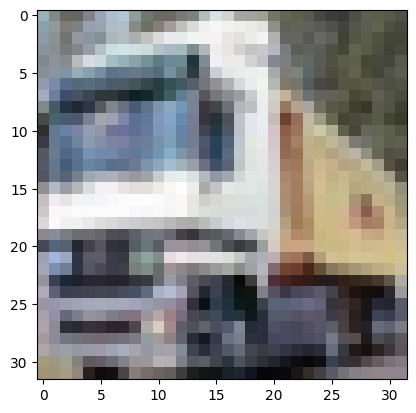

In [79]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [80]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmentation generator

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [82]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [84]:
# Create an ImageDataGenerator object

image_generator = ImageDataGenerator(
                  preprocessing_function = monochrome,
                  rotation_range=180,
                  rescale=(1/255.0))

image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options.

In [87]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(
    training_features,
    training_labels,
    batch_size=1,
    shuffle=False)

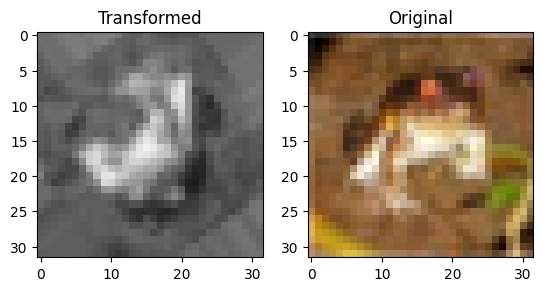

In [88]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

Download link: https://drive.google.com/file/d/149hhzKwJPhEeJn-6NELVdLbZRA_6n0rZ/view?usp=sharing

In [105]:
import zipfile
import os

# Path to the zip file
zip_file_path = "/content/flowers-recognition-split.zip"

# Directory to extract the contents
extract_dir = "/content/flowers_data"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extraction directory
extracted_files = os.listdir(extract_dir)
print("Files extracted successfully:", extracted_files)


Files extracted successfully: ['__MACOSX', 'flowers-recognition-split']


In [111]:
# Inspect the directory structure
# Please use your own path once you have downloaded the dataset and mounted your Drive

train_path = '/content/flowers_data/flowers-recognition-split/train'
val_path = '/content/flowers_data/flowers-recognition-split/val'

In [107]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [108]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [109]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(train_path, batch_size=64, classes=classes, target_size=(16,16))

Found 3027 images belonging to 5 classes.


In [112]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(val_path, batch_size=64, classes=classes, target_size=(16,16))

Found 1296 images belonging to 5 classes.


[0. 0. 0. 1. 0.]


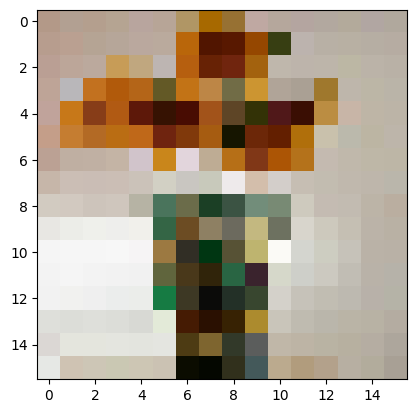

In [113]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [114]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(train_path, batch_size=64, classes=classes, target_size=(16,16))

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [115]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [116]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [117]:
# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 8)         1544      
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 8)           0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 8)           4104      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 4)           516       
                                                                 
 flatten (Flatten)           (None, 16)                0

#### Train the model

In [119]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

47 20


In [120]:
# Fit the model

model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=5)

<ipython-input-120-2312f0f16984>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=5)


Epoch 1/5
47/47 [==============================] - 12s 127ms/step - loss: 1.5982 - accuracy: 0.2676
Epoch 2/5
47/47 [==============================] - 7s 151ms/step - loss: 1.5168 - accuracy: 0.3577
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 1.4521 - accuracy: 0.3672
Epoch 4/5
47/47 [==============================] - 8s 166ms/step - loss: 1.3961 - accuracy: 0.3996
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 1.3491 - accuracy: 0.4188


#### Evaluate the model

In [121]:
# Evaluate the model

model.evaluate_generator(val_generator, steps=val_steps)

<ipython-input-121-59c8ec21c885>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(val_generator, steps=val_steps)


[1.3340461254119873, 0.4312500059604645]

#### Predict using the generator

In [123]:
# Predict labels with the model

predictions = model.predict_generator(val_generator, steps=1)
print(np.round(predictions, 2))

<ipython-input-123-d3297418a36b>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(val_generator, steps=1)


[[0.08 0.09 0.29 0.16 0.39]
 [0.24 0.64 0.03 0.06 0.04]
 [0.09 0.11 0.07 0.51 0.22]
 [0.2  0.21 0.11 0.27 0.2 ]
 [0.05 0.07 0.29 0.14 0.46]
 [0.25 0.42 0.06 0.19 0.09]
 [0.16 0.16 0.22 0.19 0.28]
 [0.22 0.2  0.17 0.18 0.22]
 [0.27 0.26 0.12 0.17 0.17]
 [0.16 0.6  0.01 0.2  0.03]
 [0.01 0.02 0.24 0.1  0.63]
 [0.12 0.14 0.25 0.18 0.31]
 [0.14 0.25 0.04 0.44 0.12]
 [0.1  0.14 0.06 0.51 0.19]
 [0.05 0.07 0.25 0.18 0.44]
 [0.23 0.62 0.04 0.07 0.05]
 [0.14 0.17 0.08 0.4  0.19]
 [0.08 0.1  0.29 0.16 0.38]
 [0.08 0.09 0.28 0.17 0.39]
 [0.23 0.24 0.14 0.18 0.21]
 [0.03 0.04 0.28 0.11 0.54]
 [0.22 0.5  0.04 0.17 0.07]
 [0.16 0.16 0.14 0.29 0.25]
 [0.23 0.23 0.17 0.17 0.2 ]
 [0.07 0.08 0.17 0.29 0.39]
 [0.18 0.16 0.14 0.26 0.27]
 [0.1  0.12 0.28 0.17 0.33]
 [0.11 0.18 0.05 0.5  0.15]
 [0.18 0.18 0.17 0.21 0.26]
 [0.15 0.16 0.23 0.18 0.29]
 [0.21 0.25 0.12 0.24 0.18]
 [0.06 0.06 0.08 0.47 0.32]
 [0.04 0.06 0.25 0.17 0.48]
 [0.29 0.49 0.06 0.1  0.07]
 [0.18 0.62 0.01 0.16 0.03]
 [0.16 0.62 0.01 0.1

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1BAjGPFlpqsDdWof50Ng3Fmju5O8F1_uZ

You should store these files in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

In [125]:
import zipfile
import os

# Path to the zip file
zip_file_path = "/content/shakespeare.zip"

# Directory to extract the contents
extract_dir = "/content/shakespeare"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extraction directory
extracted_files = os.listdir(extract_dir)
print("Files extracted successfully:", extracted_files)


Files extracted successfully: ['shakespeare']


In [126]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [127]:
x = np.zeros((100,10,2,2))

In [128]:
# Create a dataset from the tensor x

dataset1 = tf.data.Dataset.from_tensor_slices(x)

In [129]:
# Inspect the Dataset object

print(dataset1)
print(dataset1.element_spec)

<_TensorSliceDataset element_spec=TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)>
TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)


In [130]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [131]:
# Try creating a dataset from the tensor x2

dataset2 = tf.data.Dataset.from_tensor_slices(x2)

ValueError: Can't convert non-rectangular Python sequence to Tensor.

Observe que, acima, a primeira dimensão foi interpretada como um número de lotes e a segunda dimensão foi interpretada como o tamanho do lote. Nesse caso, temos tamanhos de lote diferentes, então, claramente, eles não podem estar na mesma lista.

In [132]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [133]:
# Create another dataset from the new x2 and inspect the Dataset object

dataset2 = tf.data.Dataset.from_tensor_slices(x2)

In [134]:
# Print the element_spec

print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


#### Create a zipped dataset

In [137]:
# Combine the two datasets into one larger dataset

dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))

In [138]:
# Print the element_spec

print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [139]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [140]:
# Find the number of batches in the zipped Dataset

get_batches(dataset_zipped)

3

Vemos que é três, que é o número de lotes no segundo conjunto de dados, mas é muito menor do que os 100 lotes que estavam no primeiro conjunto de dados. Portanto, apenas um aviso: se você compactar dois conjuntos de dados com números diferentes de lotes , o conjunto de dados com o grande número de lotes será cortado para acomodar o conjunto de dados menor.

#### Create a dataset from numpy arrays

In [141]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

11490434/11490434 [==============================] - 1s 0us/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [142]:
# Create a Dataset from the MNIST data

mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [143]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [145]:
# Inspect the length of an element using the take method

element = next(iter(mnist_dataset.take(1)))
print(len(element))

2


In [146]:
# Examine the shapes of the data

print(element[0].shape)
print(element[1].shape)

(28, 28)
()


#### Create a dataset from text data

In [148]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('/content/shakespeare/shakespeare')])

print(text_files)

['/content/shakespeare/shakespeare/tempest.1.1.txt', '/content/shakespeare/shakespeare/tempest.1.2.txt', '/content/shakespeare/shakespeare/tempest.2.1.txt', '/content/shakespeare/shakespeare/tempest.2.2.txt', '/content/shakespeare/shakespeare/tempest.3.1.txt', '/content/shakespeare/shakespeare/tempest.3.2.txt', '/content/shakespeare/shakespeare/tempest.3.3.txt', '/content/shakespeare/shakespeare/tempest.4.1.txt', '/content/shakespeare/shakespeare/tempest.5.1.txt']


In [149]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [152]:
# Load the lines from the files into a dataset using TextLineDataset

shakespeare_dataset = tf.data.TextLineDataset(text_files)

In [153]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [154]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

121


In [155]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

3134


#### Interleave lines from the text data files

In [156]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'/content/shakespeare/shakespeare/tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/shakespeare/tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/shakespeare/tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/shakespeare/tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/shakespeare/tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/shakespeare/tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/shakespeare/tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/shakespeare/tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/shakespeare/tempest.5.1.txt', shape=(), dtype=string)


In [158]:
# Interleave the lines from the text files

interleaved_shakespeare_dataset = text_files_dataset.interleave(tf.data.TextLineDataset, cycle_length=9)
print(interleaved_shakespeare_dataset.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [159]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [160]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#### Load the UCI Bank Marketing Dataset

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1cNtP4iDyGhF620ZbmJdmJWYQrRgJTCum

You should store these files in Drive for use in this Colab notebook.

In [161]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Load the CSV file into a pandas DataFrame
# Please use your own path once you have downloaded the dataset and mounted your Drive

bank_dataframe = pd.read_csv('your_gdrive/bank/bank-full.csv', delimiter=';')

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

In [ ]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

In [ ]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

#### Preprocess the data

In [ ]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

*N.B. The below cell has been updated to correct the name of a variable and differs from the Coding Tutorial video.*

In [ ]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

*N.B. Please use ``bank_dataframe.to_dict(orient='list')`` to convert the correct dataframe to a dictionary suitable for use in the ``from_tensor_slices`` function, rather than ``dict(dataframe)`` as specified in the coding tutorial video.*

In [ ]:
# Convert the DataFrame to a Dataset



In [ ]:
# Inspect the Dataset object



#### Filter the Dataset

In [ ]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

In [ ]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [ ]:
# Check the records in the dataset again

check_divorced()

#### Map a function over the dataset

In [ ]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'



In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

In [ ]:
# Remove the 'marital' column



In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

#### Create input and output data tuples

In [ ]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [ ]:
# Map this function over the dataset



In [ ]:
# Inspect the Dataset object



#### Split into a training and a validation set

In [ ]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

In [ ]:
# Make training and validation sets from the dataset



#### Build a classification model

Now let's build a model to classify the features.

In [ ]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Show the model summary

model.summary()

#### Train the model

In [ ]:
# Create batched training and validation datasets



In [ ]:
# Shuffle the training data



In [ ]:
# Fit the model



In [ ]:
# Plot the training and validation accuracy

